In [13]:
#padded with mirroring instead of resizing.

import os
import tensorflow as tf
os.environ['KERAS_BACKEND'] = 'tensorflow'

import sys
import random
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

import tensorflow as tf

from keras.preprocessing.image import array_to_img, img_to_array, load_img
        
PATH = 'input'

train_df = pd.read_csv('input/train.csv')
train_ids = train_df.id.values

sample_df = pd.read_csv('input/sample_submission.csv')
test_ids = sample_df.id.values

In [14]:
def resize_mirror(img):
    out = np.zeros((128, 128))
    out[:img.shape[0], :img.shape[1]] = img
    out[img.shape[0]:, :img.shape[1]] = img[::-1, :][:27, :]
    out[:, img.shape[1]:] = out[:, ::-1][:, 27:27+27]
    return out

def pad(img):
    return np.pad(img, ((13, 14), (13, 14)), mode='symmetric')    
    
def load_resized(path):
    img = load_img(path)  
    x = img_to_array(img)[:,:,1]
    if x.shape != (101, 101):
        print(path, shape)
    
    #return resize_mirror(x).reshape(128, 128, 1)
    return pad(x).reshape(128, 128, 1)
    



In [15]:
x1 = load_resized(os.path.join(PATH, 'train', 'images', '%s.png' % '4875705fb0'))
x2 = load_resized(os.path.join(PATH, 'train', 'masks', '%s.png' % '4875705fb0'))

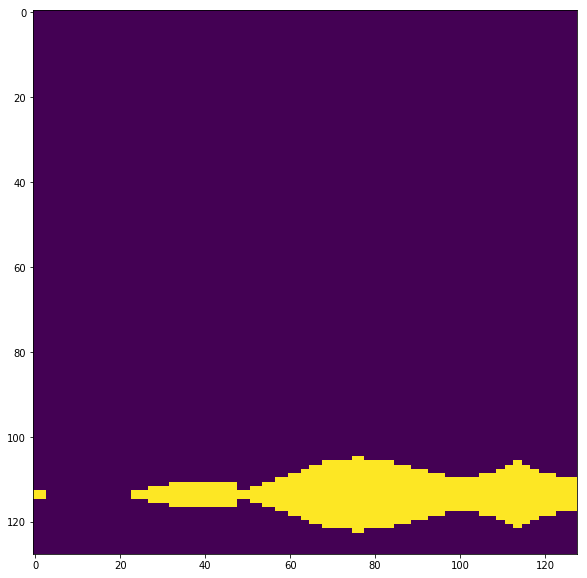

In [16]:
plt.figure(figsize=(10, 10))
plt.imshow(x2[:,:,0])

In [17]:
im_width = 128
im_height = 128
im_chan = 1


# Get and resize train images and masks
X_train = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.float32)
Y_train = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):    
    X_train[n] = load_resized(os.path.join(PATH, 'train', 'images', "%s.png" % id_))
    Y_train[n] = load_resized(os.path.join(PATH, 'train', 'masks', "%s.png" % id_))



  0%|          | 2/4000 [00:00<04:23, 15.19it/s]

Getting and resizing train images and masks ... 


100%|██████████| 4000/4000 [00:08<00:00, 486.64it/s]


In [18]:
#mean = np.mean(X_train/255)
#std = np.std(X_train/255)
#print(mean, std)
mean = 0.5
std = 1.0

In [19]:
X_train /= 255.0 
X_train -= mean
X_train /= std
print('Done!')

Done!


In [20]:
# Get and resize test images
X_test = np.zeros((len(test_ids), im_height, im_width, im_chan), dtype=np.float32)

print('Getting and resizing test images ... ')

for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    X_test[n] = load_resized(os.path.join(PATH, 'test', 'images', '%s.png' % id_))
    
X_test /= 255.0    
X_test -= mean
X_test /= std
print('Done!')

  0%|          | 6/18000 [00:00<06:17, 47.69it/s]

Getting and resizing test images ... 


100%|██████████| 18000/18000 [00:41<00:00, 436.58it/s]


Done!


In [21]:
np.save('input/X_train2.npy', X_train)
np.save('input/y_train2.npy', Y_train)
np.save('input/X_test2.npy', X_test)